# **Modeling**
---
Modeling the data after preprocessing

### **Import Package and Data**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
X_train = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/X_train_clean.csv").reset_index(drop=True)
y_train = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/y_train.csv").reset_index(drop=True)
X_test = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/X_test_clean.csv").reset_index(drop=True)
y_test = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/y_test.csv").reset_index(drop=True)

### **Create the Baseline Model**

In [3]:
#before fitting model, let's create the baseline
y_pred_baseline = y_train.mean()
y_pred_baseline

27.56794877283105

In [4]:
from sklearn.metrics import mean_absolute_error

In [5]:
mae_train_baseline = mean_absolute_error(y_train, y_pred_baseline * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_pred_baseline * np.ones(len(y_test)))

mae_train_baseline, mae_test_baseline

(28.69700652908825, 28.252240347096794)

### **Linear Regression**

In [73]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediksi pada data pelatihan dan pengujian
y_pred_train = regressor.predict(X_train)
mae_train_lnr = mean_absolute_error(y_train, y_pred_train)

mae_train_lnr

2.5771463776129844

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

mae_scorer = make_scorer(mean_absolute_error)

cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=mae_scorer)

# Hitung rata-rata skor CV
mae_lnr_cv = cv_scores.mean()

In [75]:
print(f"MAE Train :{mae_train:.4f}")
print(f"MAE CV    :{mae_cv:.4f}")

MAE Train :2.5771
MAE CV    :2.5802


### **Decision Tree**

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
params = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

#buat GridSearchCV

tree = DecisionTreeRegressor(random_state = 123)

tree_cv = GridSearchCV(estimator = tree,
                      param_grid = params,
                      cv = 5,
                      scoring = "neg_mean_absolute_error")

In [11]:
# Fit grid search cv
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_absolute_error')

In [12]:
# Best params
tree_cv.best_params_

{'max_depth': 10}

In [13]:
# Refit the bagging tree
tree = DecisionTreeRegressor(max_depth = tree_cv.best_params_["max_depth"],
                             random_state = 123)

tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [14]:
# Predict
y_pred_train = tree.predict(X_train)

# MSE
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
mae_cv_dt = -tree_cv.best_score_

print(f"MSE Train :{mae_train_dt:.4f}")
print(f"MSE CV    :{mae_cv_dt:.4f}")

MSE Train :1.0140
MSE CV    :1.1961


### **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Build random forest
rf_tree = RandomForestRegressor(n_estimators = 100,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

In [21]:
# Fit random forest
rf_tree.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [22]:
# Predict
y_pred_train = rf_tree.predict(X_train)
y_pred_test = rf_tree.predict(X_test)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(0.368259111015981, 2.5868478881278523)

In [30]:
B = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
params = {"n_estimators": B,
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [31]:
# Fit grid search cv
rf_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring='neg_mean_absolute_error')

In [32]:
# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 15}

In [34]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=15, random_state=123)

In [35]:
# Predict
y_pred_train = rf_tree.predict(X_train)

# MSE
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_cv_rf = -rf_tree_cv.best_score_

print(f"MAE Train :{mae_train_rf:.4f}")
print(f"MAE CV    :{mae_cv_rf:.4f}")

MAE Train :0.4386
MAE CV    :1.1243


### **AdaBoost**

In [36]:
from sklearn.ensemble import AdaBoostRegressor


# Build random forest
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = 50,
                             random_state = 123)

In [38]:
# Fit random forest
ada_tree.fit(X_train, y_train)

C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=123)

In [40]:
# Predict
y_pred_train = ada_tree.predict(X_train)
y_pred_test = ada_tree.predict(X_test)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(5.943158923215691, 5.475521232295603)

In [41]:
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             random_state = 123)

ada_tree_cv = GridSearchCV(estimator = ada_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [43]:
# Fit grid search cv
ada_tree_cv.fit(X_train, y_train)

C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=123),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring='neg_mean_absolute_error')

In [44]:
# Best params
ada_tree_cv.best_params_

{'n_estimators': 7}

In [46]:
# Refit the Adaboost
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = ada_tree_cv.best_params_["n_estimators"],
                             random_state = 123)

ada_tree.fit(X_train, y_train)

C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=7, random_state=123)

In [48]:
# Predict
y_pred_train = ada_tree.predict(X_train)

# MSE
mae_train_ab = mean_absolute_error(y_train, y_pred_train)
mae_cv_ab = -ada_tree_cv.best_score_

print(f"MAE Train :{mae_train_ab:.4f}")
print(f"MAE CV    :{mae_cv_ab:.4f}")

MAE Train :2.6031
MAE CV    :2.7400


### **Gradient Boosting**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 123)
grad_tree.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [51]:
# Predict
y_pred_train = grad_tree.predict(X_train)
y_pred_test = grad_tree.predict(X_test)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(1.7447960696199512, 1.8085516441448461)

In [52]:
params = {"n_estimators": B}

# Buat gridsearch
grad_tree = GradientBoostingRegressor(random_state = 123)

grad_tree_cv = GridSearchCV(estimator = grad_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [53]:
# Fit grid search cv
grad_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring='neg_mean_absolute_error')

In [54]:
# Best params
grad_tree_cv.best_params_

{'n_estimators': 15}

In [55]:
# Refit the Adaboost
grad_tree = GradientBoostingRegressor(n_estimators = grad_tree_cv.best_params_["n_estimators"],
                                      random_state = 123)

grad_tree.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=15, random_state=123)

In [57]:
# Predict
y_pred_train = grad_tree.predict(X_train)

# MSE
mae_train_gb = mean_absolute_error(y_train, y_pred_train)
mae_cv_gb = -grad_tree_cv.best_score_

print(f"MSE Train :{mae_train_gb:.4f}")
print(f"MSE CV    :{mae_cv_gb:.4f}")

MSE Train :6.3999
MSE CV    :6.4056


### **Bagging**

In [58]:
from sklearn.ensemble import BaggingRegressor

# Base estimator
tree = DecisionTreeRegressor()

# Buat Bagging
bagging_tree = BaggingRegressor(base_estimator = tree,
                                n_estimators = 10,
                                random_state = 123)

# Fit bagging
bagging_tree.fit(X_train, y_train)

C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=123)

In [60]:
# Predict
y_pred_train = bagging_tree.predict(X_train)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"MAE Train :{mae_train:.4f}")

MAE Train :0.1601


In [61]:
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor()
bagging_tree = BaggingRegressor(base_estimator = tree,
                                random_state = 123)

bagging_cv = GridSearchCV(estimator = bagging_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [63]:
# Fit grid search cv
bagging_cv.fit(X_train, y_train)

C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\yusril\anaconda3\Lib\

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=123),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring='neg_mean_absolute_error')

In [64]:
# Best params
bagging_cv.best_params_

{'n_estimators': 15}

In [67]:
# Refit the bagging tree
bagging_tree = BaggingRegressor(base_estimator = tree,
                                n_estimators = bagging_cv.best_params_["n_estimators"],
                                random_state = 123)

bagging_tree.fit(X_train, y_train)

C:\Users\yusril\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=15,
                 random_state=123)

In [68]:
# Predict
y_pred_train = bagging_tree.predict(X_train)

# MSE
mae_train_bg = mean_absolute_error(y_train, y_pred_train)
mae_cv_bg = -bagging_cv.best_score_

print(f"MAE Train :{mae_train_bg:.4f}")
print(f"MAE CV    :{mae_cv_bg:.4f}")

MAE Train :0.1491
MAE CV    :0.4064


### **Comparasion**

In [78]:
mae_train = [mae_train_dt, mae_train_bg, mae_train_rf, mae_train_ab, mae_train_gb, mae_train_lnr]
mae_cv = [mae_cv_dt, mae_cv_bg, mae_cv_rf, mae_cv_ab, mae_cv_gb, mae_lnr_cv]
indexes = ["decision tree", "bagging", "random forest", "adaBoost", "gradientBoost", "Linear Regression"]

summary_df = pd.DataFrame({"MAE Train": mae_train,
                           "MAE CV": mae_cv},
                          index = indexes)
summary_df

,MAE Train,MAE CV
decision tree,1.013998,1.196125
bagging,0.149141,0.406396
random forest,0.438629,1.124281
adaBoost,2.603104,2.740038
gradientBoost,6.399928,6.405598
Linear Regression,2.577146,2.580218


### **Best Model**

In [79]:
# Predict MSE
y_pred_test = rf_tree.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test, mae_test_baseline

(2.9735329147640797, 28.252240347096794)

(0.0, 60.0)

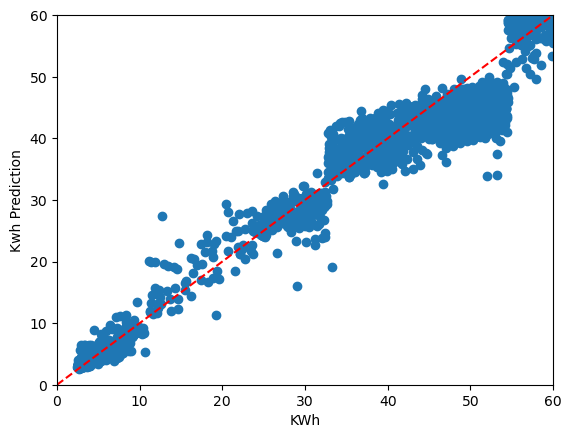

In [83]:
plt.scatter(y_test, y_pred_test)
plt.plot([0, 60], [0,60], "--r")

plt.xlabel("KWh")
plt.ylabel("Kwh Prediction")
plt.xlim(0, 60)
plt.ylim(0, 60)


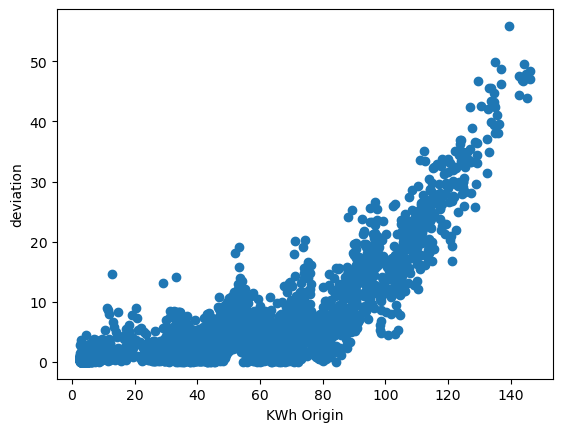

In [82]:
price_deviation = np.abs(y_test - y_pred_test)

plt.scatter(y_test, price_deviation)
plt.xlabel("KWh Origin")
plt.ylabel("deviation")

plt.show()